<a href="https://colab.research.google.com/github/gomesluiz/commonlit-readability-predicting/blob/main/make_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição da Legibilidade de um Texto
<img src="https://github.com/gomesluiz/commonlit-readability-predicting/blob/main/images/banner_w_border.png?raw=true" 
        alt="Banner do projeto" 
        width="1020" 
        height="300" 
        style="display: block; margin: 0 auto" />
<br/>
A legibilidade mede a facilidade com que um leitor pode compreender e assimilar um conteúdo escrito. Essa medida está relacionada à fluidez da leitura e à capacidade do leitor em processar e entender as informações apresentadas. Um texto de alta legibilidade é fácil de ler, compreender e reter, enquanto um texto de baixa legibilidade é mais difícil de ser assimilado.
<br/><br/>
O objetivo deste notebook é mostrar o processo de criação de um modelo de predição de legibilidade de um texto baseado em técnicas de Aprendizado de Máquina (AM) e de Processamento de Linguagem Natural (PLN). Tal modelo poderá ser utilizado para indicar o texto mais apropriado conforme o perfil do leitor e, assim, ajudar a motivar o hábito de leitura. 
<br/><br/>


## Pacotes Python
Os seguintes pacotes Python de terceiros são necessários para a execução com sucesso desse notebook:

* [Matplotlib](https://matplotlib.org/): biblioteca para a criação de gráficos e visualizações de dados em geral. 
* [NLTK](https://www.nltk.org/): biblioteca para processamento de textos e linguagem natural.
* [Pandas](https://pandas.pydata.org/): biblioteca para análise de dados fornece estruturas flexíveis e eficientes para trabalhar com dados estruturados e tabelas numéricas. 
* [Sklearn](https://scikit-learn.org/stable/index.html): biblioteca para tarefas aprendizado de máquina. Fornece uma ampla variedade de algoritmos de aprendizado de máquina supervisionados e não supervisionados.

A forma mais simples para a instalação destas bibliotecas é instalá-las em um ambiente virtual Python. No Linux, essa tarefa pode ser feita assim:

```
~$ cd predicao-de-legibilidade
~/predicao-de-legibilidade$ python -m venv .venv
~/predicao-de-legibilidade$ source .venv/bin/activate
~/predicao-de-legibilidade$ pip install matplotlib nltk pandas sklearn
```

Já no Windows, ela pode ser feita assim:
```
C:\> cd predicao-de-legibilidade
C:\predicao-de-legibilidade> python -m venv .venv
C:\predicao-de-legibilidade> .venv/Scripts/activate.bat
C:\predicao-de-legibilidade> pip install matplotlib nltk pandas sklearn
```

No [Google Colab](https://colab.research.google.com/), todos os pacotes necessários já estão instalado.

## Metodologia
A metodologia deste projeto está divida nas etapas do processo padrão de mineração de dados denominado Cross Industry Process for Data Mining (CRISP-DM). O modelo CRISP-DM define um conjunto comum de etapas, tarefas e entregáveis necessários para a realização bem-sucedida de um projeto de mineração de dados. Esse modelo é composto por seis etapas principais:
<br/><br/>

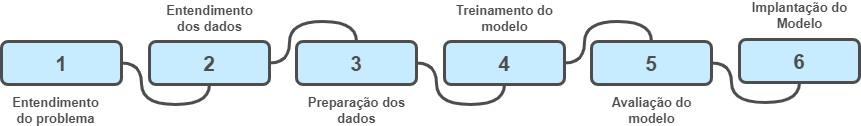



## 1. Entendimento do negócio
Nessa etapa, é necessário entender o problema abordado, bem como as questões relacionadas ele. No contexto deste projeto, a questão primária a ser respondida é

> As técnicas de Aprendizado de Máquina (AM) e de Processamento de Linguagem Natural (PLN) podem predizer a legibilidade de um texto?


## 2. Entendimento dos dados

Nesta etapa, é necessário avaliar os dados estão disponíveis ou se é necessário coletar dados para responder às perguntas levantadas na etapa de **entendimento do negócio**.
<br/><br/>
O modelo supervisionado de regressão será desenvolvido a partir de uma base de dados utilizada na competição [CommonLit Readability Prize](https://www.kaggle.com/competitions/commonlitreadabilityprize) promovida pela Kaggle  e patrocinada pela empresa [CommonLit, Inc.](https://www.commonlit.org/en); e pelo [Departamento de Linguística da Georgia State University](https://alsl.gsu.edu/).
<br/><br/>
**Descrição da base de dados**

* **id** - Identificador para trecho do texto.
* **url_legal** - URL da fonte do trecho do texto.
* **license** - Licença de uso do trecho do texto.
* **excerpt** - Trecho do texto avaliado.
* **target** - legibilidade do trecho do texto.
* **standard_error** - medida de distribuição de pontuações entre vários avaliadores para cada trecho. 


### 2.1 Coleta de dados




In [ ]:
import pandas as pd
trechos = pd.read_csv("https://raw.githubusercontent.com/gomesluiz/commonlit-readability-predicting/main/datasets/train.csv", usecols=["excerpt", "target"])
trechos.columns = ["trecho", "legibilidade"]
trechos.head()

## 2.2 Análise exploratória de dados

In [ ]:
def conta_palavra(texto):
  """Conta palavras no texto."""
  return len(texto.split())

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(15, 5))
plt.subplot(1, 2, 1)
_ = plt.boxplot(trechos["legibilidade"])
_ = plt.title("Legibilidade dos trechos de textos")
_ = plt.xticks([], [])

plt.subplot(1, 2, 2)
_ = plt.hist(trechos["trecho"].apply(conta_palavra))
_ = plt.title("Distribuição da quantidade de palavras nos trechos")

plt.show()

## 3. Preparação de dados
O objetivo desta etapa do CRISP-DM é limpar e transformar os dados em um formato adequado para o treinamento do modelo.


### 3.1. Limpeza de dados

### 3.2. Normalização de dados

### 3.3. Tokenização

### 3.4. Remoção de palavras irrelevantes



In [ ]:
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def preprocessa_texto(texto):
  # remove pontuação do texto.
  # normaliza o texto para minúsculo.
  texto_normalizado = "".join([palavra.lower() for palavra in texto if palavra not in string.punctuation])
  
  # tokeniza o texto
  texto_tokenizado = nltk.tokenize.word_tokenize(texto_normalizado)

  # remove palavras irrelevantes (stop words)
  texto_sem_stopwords = " ".join([palavra for palavra in texto_tokenizado if palavra not in stopwords])
 
  return texto_sem_stopwords

In [ ]:
# Teste da função preprocessa_texto.
print(f"Texto original:\n{trechos.iloc[0]['trecho']}")
print(f"Texto pré-processado:\n{preprocessa_texto(trechos.iloc[0]['trecho'])}")

In [ ]:
# Pré-processa os trechos de textos.
trechos["trecho_processado"] = trechos["trecho"].apply(preprocessa_texto)
trechos.head()

### 3.5 Vetorização

In [ ]:
# Divide o dataset de trechos de textos em treinamento e teste.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trechos["trecho_processado"], trechos["legibilidade"], test_size=.25, random_state=32)

In [ ]:
# Vetoriza os conjuntos de treinamento.
from sklearn.feature_extraction.text import CountVectorizer
vetorizador = CountVectorizer(max_features=1000)
X_train_vetorizado = vetorizador.fit_transform(X_train)
X_train_vetorizado = pd.DataFrame(X_train_vetorizado.toarray(), columns=vetorizador.get_feature_names_out())
X_train_vetorizado.index = X_train_vetorizado.index
X_train_vetorizado.head()

In [ ]:
# Vetoriza os conjuntos de testes.
X_test_vetorizado = vetorizador.transform(X_test)
X_test_vetorizado = pd.DataFrame(X_test_vetorizado.toarray(), columns=vetorizador.get_feature_names_out())
X_test_vetorizado.index = X_test_vetorizado.index
X_test_vetorizado.head()

## 4. Treinamento do modelo
O objetivo desta estapa é construir é treinar o modelo resolver o problema de negócio.

In [ ]:
# Treina o modelo com o regressor random forest para estabelecimento
# de um baseline.
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
_= reg.fit(X_train_vetorizado, y_train)
print("Modelo baseline treinado.")

## 5. Avaliação do modelo
O objetivo desta etapa é avaliar o desempenho dos modelos de aprendizagem e determinar se eles são adequados para resolver o problema de negócio.


### 5.1 Teste do modelo

In [ ]:
y_pred = reg.predict(X_test_vetorizado)

### 5.2 Avaliação dos resultados

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Média dos quatrados dos erros.
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Coeficiente de determinação: 1 significa uma predição perfeita.
print("Coeficiente de determinação: %.2f" % r2_score(y_test, y_pred))


## 6. Implantação do modelo
O objetivo desta etapa é implementar os modelos de mineração de dados escolhidos na fase anterior e integrá-los ao processo de negócio.

In [ ]:
import pickle
from datetime import datetime

timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
arquivo = f"{timestamp}-modelo_predicao_legibilidade.sav"
pickle.dump(reg, open(arquivo, 'wb'))